In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


data = pd.read_csv("Data_COVID19_Engl_sh_processed.csv")


#### Null Hypothesis (H0): There is no significant difference in the usage of credit/debit cards and online spending habits between urban and rural people.
#### Alternative Hypothesis (H1): The usage of credit/debit cards and online spending habits has increased more for urban people than rural people.

In [19]:
health_outcomes = data[['srh_n', 'chr_n']]
economic_behavior = data[['cre_n', 'int_n']]
# Assuming 'urb_n' contains labels for urban and rural areas
urban_rural = data['urb_n']

# number of people 
print(data[data['urb_n']==1].shape[0])
print(data[data['urb_n']==2].shape[0])

# lets take min of the two by subsampling 
n = min(data[data['urb_n']==1].shape[0], data[data['urb_n']==2].shape[0])

urban = data[data['urb_n']==1].sample(n)
rural = data[data['urb_n']==2].sample(n)



239
2614


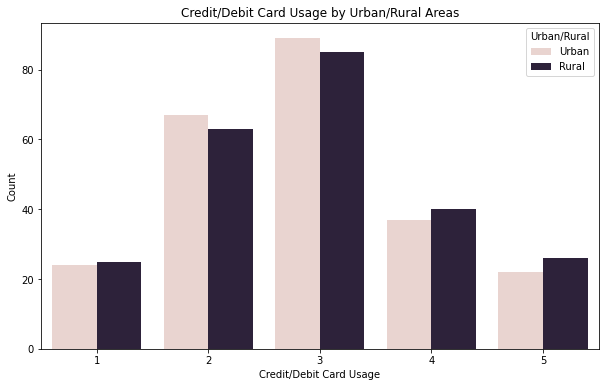

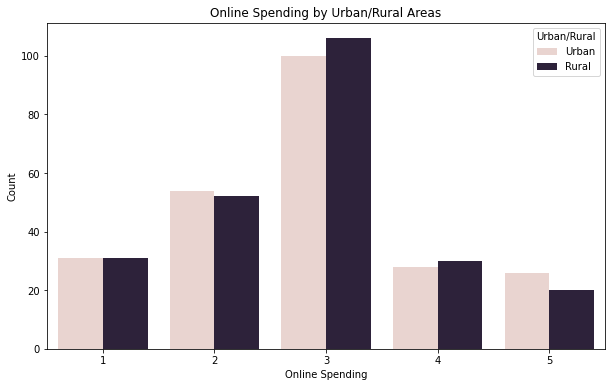

In [21]:

# Bar plots for economic behavior
combined_data = pd.concat([urban, rural])

# Plot combined bar plots for economic behavior
plt.figure(figsize=(10, 6))
sns.countplot(data=combined_data, x='cre_n', hue='urb_n')
plt.title('Credit/Debit Card Usage by Urban/Rural Areas')
plt.xlabel('Credit/Debit Card Usage')
plt.ylabel('Count')
plt.legend(title='Urban/Rural', labels=['Urban', 'Rural'])
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=combined_data, x='int_n', hue='urb_n')
plt.title('Online Spending by Urban/Rural Areas')
plt.xlabel('Online Spending')
plt.ylabel('Count')
plt.legend(title='Urban/Rural', labels=['Urban', 'Rural'])
plt.show()


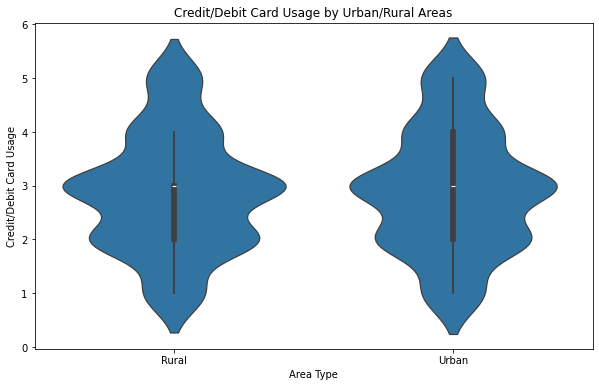

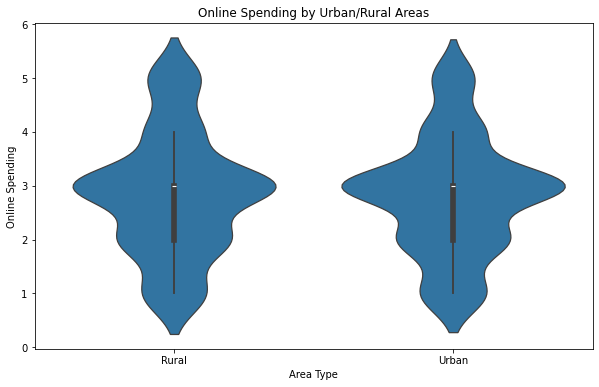

In [22]:
# collect the mean values of spending habits in urban and rural areas
urban_mean = urban[['cre_n', 'int_n']].mean()
rural_mean = rural[['cre_n', 'int_n']].mean()

# Violin plot for credit/debit card usage by urban/rural areas
plt.figure(figsize=(10, 6))
sns.violinplot(data=combined_data, x='urb_n', y='cre_n')
plt.title('Credit/Debit Card Usage by Urban/Rural Areas')
plt.xlabel('Area Type')
plt.ylabel('Credit/Debit Card Usage')
plt.xticks(ticks=[0, 1], labels=['Rural', 'Urban'])
plt.show()

# Violin plot for online spending by urban/rural areas
plt.figure(figsize=(10, 6))
sns.violinplot(data=combined_data, x='urb_n', y='int_n')
plt.title('Online Spending by Urban/Rural Areas')
plt.xlabel('Area Type')
plt.ylabel('Online Spending')
plt.xticks(ticks=[0, 1], labels=['Rural', 'Urban'])
plt.show()




In [23]:
# check normality of the data
from scipy.stats import shapiro

# Check normality of 'cre_n' and 'int_n'
cre_n_urban = combined_data[combined_data['urb_n'] == 2]['cre_n']
cre_n_rural = combined_data[combined_data['urb_n'] == 1]['cre_n']

int_n_urban = combined_data[combined_data['urb_n'] == 2]['int_n']
int_n_rural = combined_data[combined_data['urb_n'] == 1]['int_n']

stats_cre_urban, p_val_cre_urban = shapiro(cre_n_urban)
stats_cre_rural, p_val_cre_rural = shapiro(cre_n_rural)

stats_int_urban, p_val_int_urban = shapiro(int_n_urban)
stats_int_rural, p_val_int_rural = shapiro(int_n_rural)

print(f"Shapiro-Wilk test for 'cre_n' in urban areas:\nStatistics: {stats_cre_urban}\nP-value: {p_val_cre_urban}")  
print(f"Shapiro-Wilk test for 'cre_n' in rural areas:\nStatistics: {stats_cre_rural}\nP-value: {p_val_cre_rural}")
print(f"Shapiro-Wilk test for 'int_n' in urban areas:\nStatistics: {stats_int_urban}\nP-value: {p_val_int_urban}")
print(f"Shapiro-Wilk test for 'int_n' in rural areas:\nStatistics: {stats_int_rural}\nP-value: {p_val_int_rural}")


Shapiro-Wilk test for 'cre_n' in urban areas:
Statistics: 0.9118114709854126
P-value: 1.1210785078041852e-10
Shapiro-Wilk test for 'cre_n' in rural areas:
Statistics: 0.9086632132530212
P-value: 6.585040152051747e-11
Shapiro-Wilk test for 'int_n' in urban areas:
Statistics: 0.8977290391921997
P-value: 1.1336387557847605e-11
Shapiro-Wilk test for 'int_n' in rural areas:
Statistics: 0.8995238542556763
P-value: 1.4998806016630617e-11


The data is not normally distributed 

In [35]:
# mann-whitney test
from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U test for credit/debit card usage
u_statistic_credit, p_value_credit = mannwhitneyu(
    urban['cre_n'], rural['cre_n'])

# Perform Mann-Whitney U test for online spending habits
u_statistic_online, p_value_online = mannwhitneyu(
    urban['int_n'], rural['int_n'])

# Print the results
print("Mann-Whitney U Test Results:\n")
print("Credit or Debit Card Usage:")
print("  Mann-Whitney U statistic:", u_statistic_credit)
print("  p-value:", p_value_credit)
print("\n")

print("Online Spending Habits:")
print("  Mann-Whitney U statistic:", u_statistic_online)
print("  p-value:", p_value_online)



Mann-Whitney U Test Results:

Credit or Debit Card Usage:
  Mann-Whitney U statistic: 27813.0
  p-value: 0.6070684557853891


Online Spending Habits:
  Mann-Whitney U statistic: 28824.5
  p-value: 0.8543931134666313



The Mann-Whitney U test results indicate:

For the variable 'cre_n' (credit/debit card usage), the test statistic is 27813.0 and the p-value is approximately 0.607. Since the p-value is greater than the significance level of 0.05, we fail to reject the null hypothesis. Therefore, we do not have enough evidence to conclude that there is a significant difference in credit/debit card usage between urban and rural areas.

For the variable 'int_n' (online spending habits), the test statistic is 28824.5 and the p-value is approximately 0.85. Similarly, since the p-value is greater than 0.05, we fail to reject the null hypothesis. Therefore, we do not have enough evidence to conclude that there is a significant difference in online spending habits between urban and rural areas.

These results suggest that, based on the Mann-Whitney U test, there is no significant difference in credit/debit card usage and online spending habits between urban and rural areas.